# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from pathlib import Path

#DATA_DIR = Path("data")  # adjust if needed

#pd.set_option("display.max_columns", 100)


In [2]:
data = pd.read_csv('repeat_loans_final_2.csv', sep=';')



In [3]:
data.shape

(3572, 21)

In [4]:
#Checking any missing data (cells) in any of the features
data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
missed_instalments              2
Industry                        0
Business Type                   0
Year of Establishment           0
dtype: int64

In [5]:
data.index[data['missed_instalments'].isna()]
#Index([858, 1860], dtype='int64')
#Missing data row 860 and 1862

Index([858, 1860], dtype='int64')

In [6]:
#Dropping raws with missing values in (Missed instalments)
data = data.dropna(subset=['missed_instalments'])


In [7]:
#double check that the rows are deleted
data.shape

(3570, 21)

In [8]:
#Checking if there are any duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows 
#No duplicates detected


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment


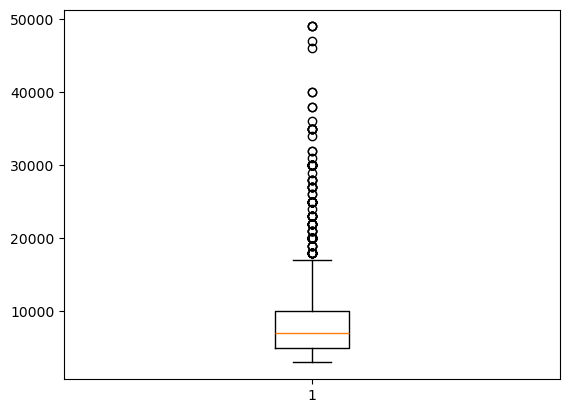

In [9]:
# Using boxplots to visualize outliers for (AmountDisbursed) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['AmountDisbursed'])
plt.show()

In [11]:
#Combination_code : Please include this cell

#Defining outlier's range for (AmountDisbursed)
Q1 = data['AmountDisbursed'].quantile(0.25)
Q3 = data['AmountDisbursed'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers= data[(data['AmountDisbursed'] < lower_bound) | (data['AmountDisbursed'] > upper_bound)]

#How many times each outlier value appears
outliers['AmountDisbursed'].value_counts()


AmountDisbursed
20000    48
30000    20
18000    16
25000    14
22000     9
23000     8
27000     5
35000     5
19000     4
21000     4
28000     4
49000     3
32000     2
38000     2
40000     2
26000     2
47000     1
24000     1
36000     1
46000     1
31000     1
34000     1
29000     1
Name: count, dtype: int64

In [12]:
#Data after removing outliers
data = data[(data['AmountDisbursed'] >= lower_bound) & (data['AmountDisbursed'] <= upper_bound)]

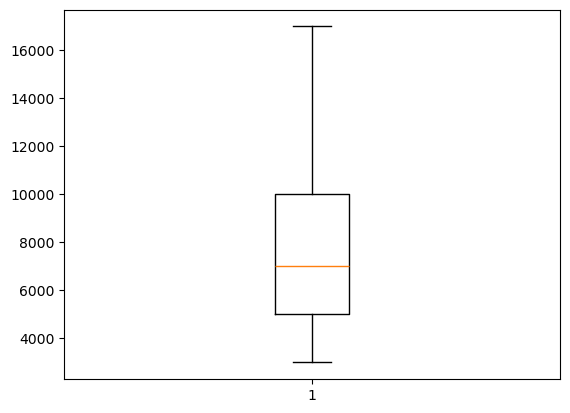

In [13]:
plt.boxplot(data['AmountDisbursed'])
plt.show()

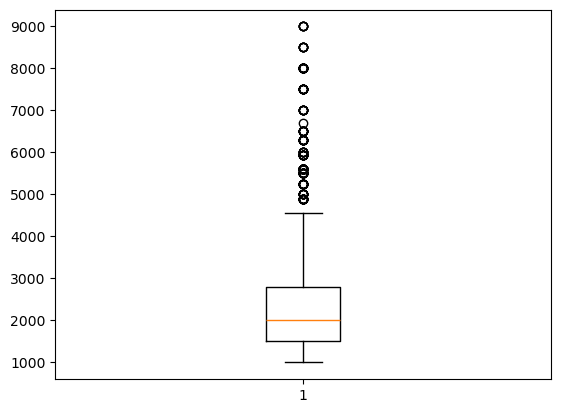

In [14]:
# Using boxplots to visualize outliers for (Interest) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['Interest'])
plt.show()

In [16]:
#Combination_code : Please include this cell

#Defining outlier's range for (interest)
Q1 = data['Interest'].quantile(0.25)
Q3 = data['Interest'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Interest= data[(data['Interest'] < lower_bound) | (data['Interest'] > upper_bound)]

#How many times each outlier value appears
outliers_Interest['Interest'].value_counts()



Interest
5600    74
5500    33
8000    29
4900    23
5250    20
6300    16
5950    15
7500    13
5000    10
6500    10
7000     8
6000     7
8500     6
9000     5
6699     1
Name: count, dtype: int64

In [17]:
#Removing outliers in column (Interest)
data = data[(data['Interest'] >= lower_bound) & (data['Interest'] <= upper_bound)]

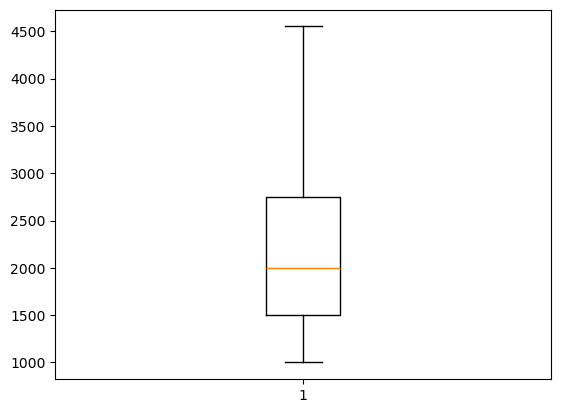

In [18]:
plt.boxplot(data['Interest'])
plt.show()

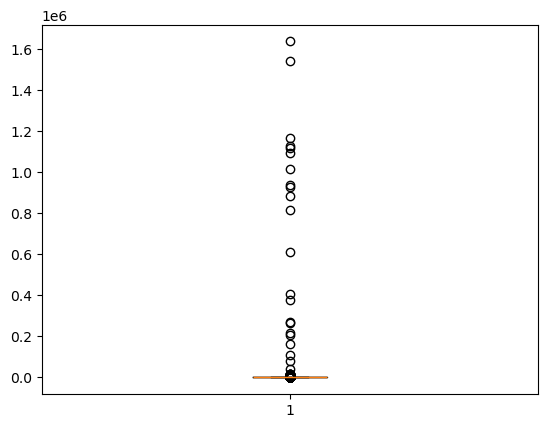

In [19]:
# Using boxplots to visualize outliers for (LoanBalance) (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['LoanBalance'])
plt.show()

In [20]:
#Combination_code : Please include this cell

#Defining outliers for (LoanBalance)
Q1 = data['LoanBalance'].quantile(0.25)
Q3 = data['LoanBalance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_LoanBalance= data[(data['LoanBalance'] < lower_bound) | (data['LoanBalance'] > upper_bound)]

#How many times each outlier value appears
outliers_LoanBalance['LoanBalance'].value_counts()

LoanBalance
7500      8
5250      7
5200      6
6200      6
3900      6
         ..
6910      1
2150      1
377701    1
1360      1
3840      1
Name: count, Length: 264, dtype: int64

In [21]:
#Removing outliers in column (LoanBalance)
data = data[(data['LoanBalance'] >= lower_bound) & (data['LoanBalance'] <= upper_bound)]

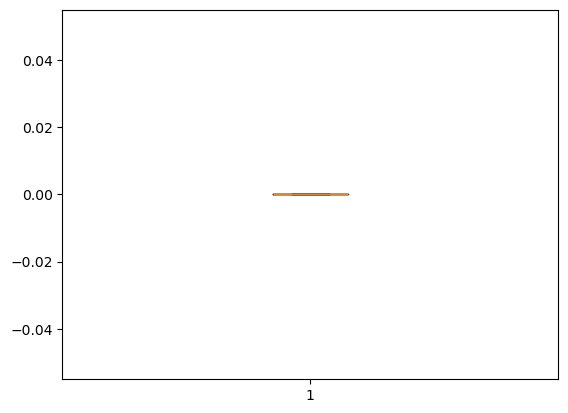

In [22]:
plt.boxplot(data['LoanBalance'])
plt.show()

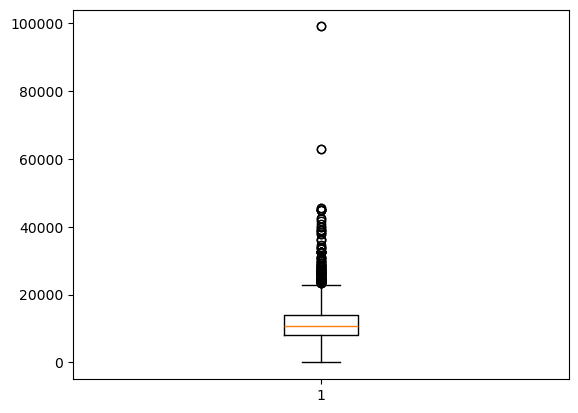

In [23]:
# Using boxplots to visualize outliers for (LoanLimit)
import matplotlib.pyplot as plt
plt.boxplot(data['LoanLimit'])
plt.show()

In [24]:
#Combination_code : Please include this cell
#Defining outlier's range for (interest)
Q1 = data['LoanLimit'].quantile(0.25)
Q3 = data['LoanLimit'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers= data[(data['LoanLimit'] < lower_bound) | (data['LoanLimit'] > upper_bound)]

#How many times each outlier value appears
outliers['LoanLimit'].value_counts()
#comment: It did not consider 0 Loanlimit as an outlier

LoanLimit
24000    15
26000    13
32500     9
27000     7
23800     6
45000     5
28000     5
24800     4
27500     4
26400     4
24500     4
23300     4
25000     3
29200     3
39000     3
30000     3
27200     3
45500     2
40000     2
99000     2
28600     2
28800     2
36000     2
25200     2
25700     2
63000     2
34000     2
38500     2
31200     2
30800     2
30600     1
25100     1
42200     1
33600     1
42500     1
40800     1
34700     1
36400     1
41600     1
38000     1
28300     1
24200     1
37800     1
33300     1
25600     1
Name: count, dtype: int64

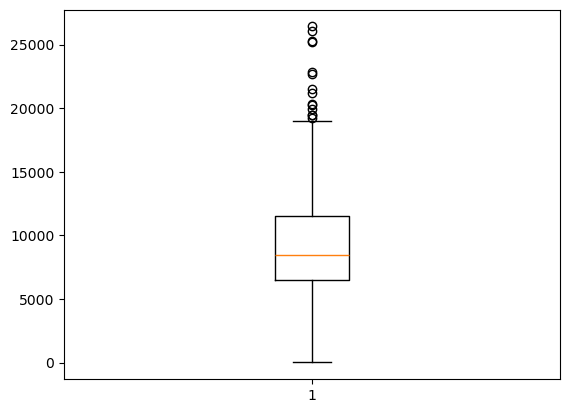

In [25]:
# Using boxplots to visualize outliers for (Loan repayment total paid)
import matplotlib.pyplot as plt
plt.boxplot(data['loan_repayment_total_paid'])
plt.show()

In [26]:
#Combination_code : Please include this cell

#Defining outlier's range for (interest)
Q1 = data['loan_repayment_total_paid'].quantile(0.25)
Q3 = data['loan_repayment_total_paid'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers= data[(data['loan_repayment_total_paid'] < lower_bound) | (data['loan_repayment_total_paid'] > upper_bound)]

#How many times each outlier value appears
outliers['loan_repayment_total_paid'].value_counts()

# comment: It did not recognise 35 as an outlier. I think Q1,Q3 and IQR method does not achieve the purpose needed

loan_repayment_total_paid
21500    1
25174    1
21200    1
19500    1
20320    1
22720    1
26037    1
22830    1
19960    1
20261    1
19260    1
26420    1
19450    1
25270    1
Name: count, dtype: int64

In [31]:
data.to_csv(r'D:\Loughbrough Uni\Semester 1\3- Principles of AI and Data Analytics\Group project\cleaned_data.csv', index=False)
